In [1]:
import pandas as pd
import numpy as np

In [2]:
start_date = '2023-07-01'
end_date = '2023-07-16'
total_days_in_month = 31
days_data_having = np.array(int(end_date[-2:])).item()- np.array(int(start_date[-2:])).item() + 1

days_to_forecast = total_days_in_month - days_data_having

# ADD THE DATASET HERE

In [3]:
# Define the file path
file_path = '/kaggle/input/month-forecast/8309-itemsRequired-16-07-2023.csv'

In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [5]:
fb_data = pd.read_csv("/kaggle/input/fb-daata/FB ads spends  - Sheet1.csv")

In [6]:
# lets see the columns
df.columns

Index(['id', 'total', 'status', 'paymentMethod', 'date_created',
       'billing_scheduled_date', 'name', 'address', 'postcode', 'zone', 'city',
       'delivery_preferrence', 'awbNumber', 'group_id', 'group_title',
       'group_courier_id', 'group_delivery_via', 'totalModaks',
       'totalPuranpoli'],
      dtype='object')

In [7]:
# Perform basic EDA
# Display the first few rows of the DataFrame
print("First few rows:")
print(df.head())

First few rows:
       id    total      status paymentMethod         date_created  \
0  360942   796.45  processing           cod  2023-07-15T12:17:19   
1  360944   897.30   completed      razorpay  2023-07-15T12:21:45   
2  360948  1076.40  processing      razorpay  2023-07-15T12:35:33   
3  360945   556.20   completed      razorpay  2023-07-15T12:28:17   
4  360268   538.20  processing      razorpay  2023-07-11T02:22:29   

  billing_scheduled_date           name  \
0    07/16/2023 07:00 AM     Yuga Pawar   
1    07/16/2023 07:00 AM  sheetal pawar   
2    07/22/2023 12:35 PM    Neeta Torne   
3    07/16/2023 12:27 PM    Mehul Furia   
4    07/18/2023 02:21 AM  Himanshu Jain   

                                             address  postcode  \
0  F1-105, Nyati Elan West, Bakori Road, Wagholi ...    412207   
1  c 402 pragati sankul kumbharkhan pada subhash ...    421202   
2  As2 Radhanagar Apt Mestabhatt Merces Goa Near ...    403005   
3  Shop no 16,mplus stationers, vasant Mahal b

In [8]:
# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                 id        total       postcode     awbNumber      group_id  \
count    2539.00000  2539.000000    2539.000000  1.366000e+03   2496.000000   
mean   359611.43718   597.269555  404163.988184  1.518370e+14  13621.268029   
std       889.23632   357.007756   35158.264136  5.074467e+04    280.093176   
min    358090.00000     0.000000  110034.000000  1.518370e+14  13002.000000   
25%    358835.00000   358.000000  400065.000000  1.518370e+14  13410.000000   
50%    359619.00000   538.200000  400601.000000  1.518370e+14  13648.000000   
75%    360380.00000   738.000000  411008.000000  1.518370e+14  13859.000000   
max    361166.00000  3848.000000  831005.000000  1.518370e+14  14069.000000   

       totalModaks  totalPuranpoli  
count  2539.000000     2539.000000  
mean      1.506499        3.991729  
std       3.523681        4.192888  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        5.000000  
75%     

In [9]:
# Check the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
id                          int64
total                     float64
status                     object
paymentMethod              object
date_created               object
billing_scheduled_date     object
name                       object
address                    object
postcode                    int64
zone                       object
city                       object
delivery_preferrence       object
awbNumber                 float64
group_id                  float64
group_title                object
group_courier_id           object
group_delivery_via         object
totalModaks                 int64
totalPuranpoli              int64
dtype: object


In [10]:
# Check the number of rows and columns in the DataFrame
print("\nShape:")
print(df.shape)


Shape:
(2539, 19)


In [11]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                           0
total                        0
status                       0
paymentMethod               20
date_created                 0
billing_scheduled_date       0
name                         0
address                      0
postcode                     0
zone                         0
city                         0
delivery_preferrence       471
awbNumber                 1173
group_id                    43
group_title                 43
group_courier_id          1286
group_delivery_via        1248
totalModaks                  0
totalPuranpoli               0
dtype: int64


**The missing values i will be removing**

In [12]:
# columns_to_drop = ['hasError', 'diff', 'totalIV', 'GSTIN']
df = df.loc[:,["date_created","total"]]

In [13]:
df.shape

(2539, 2)

**Lets remove the unecessary features**

In [14]:
from datetime import datetime

In [15]:
df.head()

,date_created,total
0,2023-07-15T12:17:19,796.45
1,2023-07-15T12:21:45,897.30
2,2023-07-15T12:35:33,1076.40
3,2023-07-15T12:28:17,556.20
4,2023-07-11T02:22:29,538.20


In [16]:
# Define a function to convert datetime string to datetime object
def convert_to_datetime(datetime_string):
    return datetime.strptime(datetime_string, '%Y-%m-%dT%H:%M:%S')

# Apply the conversion function to the "Order Created Date and Time" column
df['Order created Date'] = df['date_created'].apply(convert_to_datetime)

In [17]:
df['Order Created Date and Time'] = pd.to_datetime(df['Order created Date'])

# Sort the DataFrame based on the "Order Created Date and Time" column
df = df.sort_values('Order Created Date and Time', ascending=True)

In [18]:
type(df['Order created Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
df.head()

,date_created,total,Order created Date,Order Created Date and Time
1237,2023-07-01T00:06:05,664.20,2023-07-01 00:06:05,2023-07-01 00:06:05
341,2023-07-01T00:06:18,505.20,2023-07-01 00:06:18,2023-07-01 00:06:18
1178,2023-07-01T00:15:41,762.45,2023-07-01 00:15:41,2023-07-01 00:15:41
1238,2023-07-01T00:17:10,983.45,2023-07-01 00:17:10,2023-07-01 00:17:10
1183,2023-07-01T00:28:44,1694.90,2023-07-01 00:28:44,2023-07-01 00:28:44


In [20]:
df= df.set_index('Order created Date')

In [21]:
print (df.index)

DatetimeIndex(['2023-07-01 00:06:05', '2023-07-01 00:06:18',
               '2023-07-01 00:15:41', '2023-07-01 00:17:10',
               '2023-07-01 00:28:44', '2023-07-01 00:31:59',
               '2023-07-01 00:49:35', '2023-07-01 00:55:13',
               '2023-07-01 01:00:15', '2023-07-01 01:34:10',
               ...
               '2023-07-15 22:46:00', '2023-07-15 22:49:54',
               '2023-07-15 22:53:06', '2023-07-15 23:00:01',
               '2023-07-15 23:04:16', '2023-07-15 23:38:41',
               '2023-07-15 23:41:28', '2023-07-15 23:45:16',
               '2023-07-15 23:49:51', '2023-07-15 23:53:22'],
              dtype='datetime64[ns]', name='Order created Date', length=2539, freq=None)


# MODELS

# ARIMA MODEL WITHOUT THE FB ADS

**SHOULD CHANGE THE DATE HERE ACCORDINGLY**

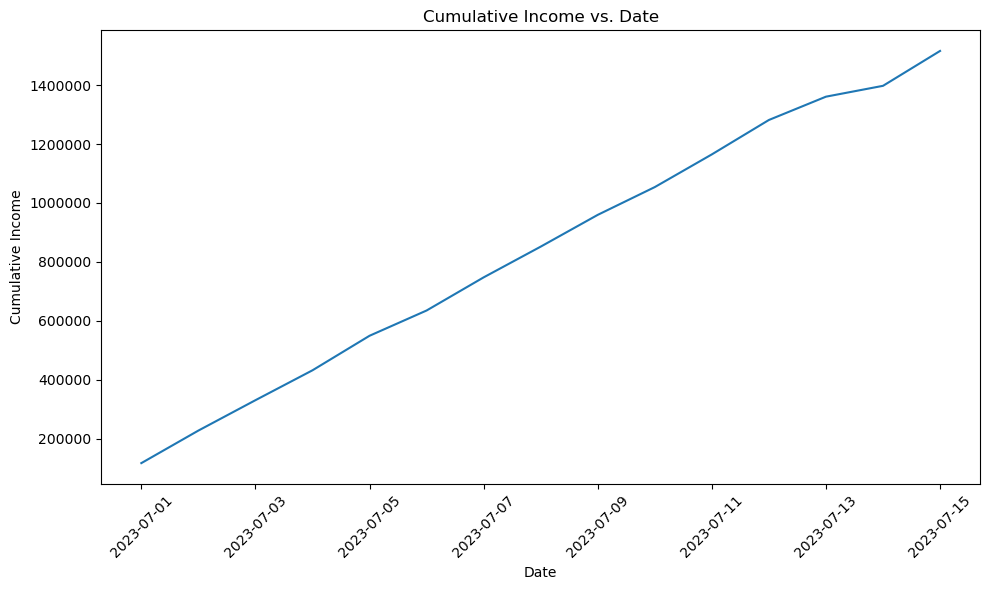

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Create a DataFrame with the date and cumulative income
df_cumulative_income = pd.DataFrame({'Date': daily_cumulative_income.index, 'Cumulative Income': daily_cumulative_income.values})

# Plot cumulative income vs. date
plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_income['Date'], df_cumulative_income['Cumulative Income'])
plt.xlabel('Date')
plt.ylabel('Cumulative Income')
plt.title('Cumulative Income vs. Date')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

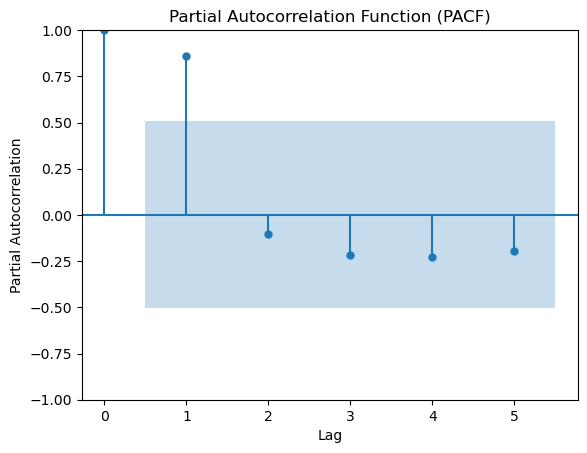

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Create a DataFrame with the date and cumulative income
df_cumulative_income = pd.DataFrame({'Date': daily_cumulative_income.index, 'Cumulative Income': daily_cumulative_income.values})

# Specify the number of lags for PACF
max_lags = 5  # Set the desired number of lags

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_cumulative_income['Cumulative Income'], lags=max_lags)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

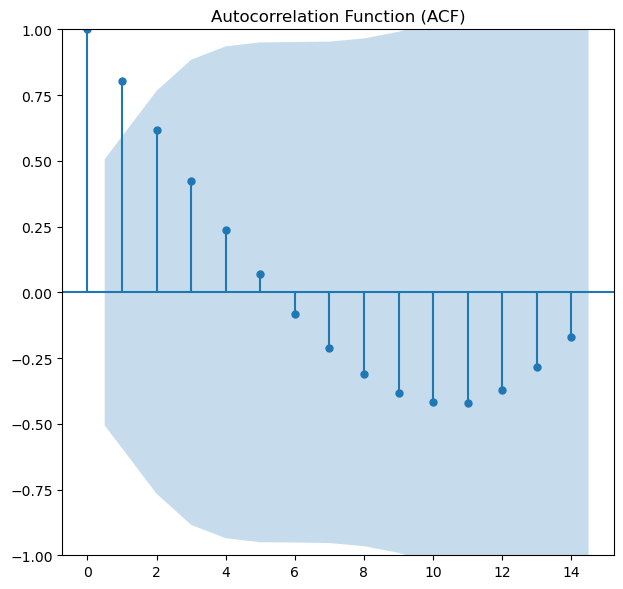

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Create a DataFrame with the date and cumulative income
df_cumulative_income = pd.DataFrame({'Date': daily_cumulative_income.index, 'Cumulative Income': daily_cumulative_income.values})

# Set the length of available data as the maximum number of lags to plot
lags = len(df_cumulative_income) - 1

# Plot ACF
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_acf(df_cumulative_income['Cumulative Income'], ax=ax1, lags=lags)


ax1.set_title('Autocorrelation Function (ACF)')

# # Plot PACF
# ax2 = plt.subplot(122)
# plot_pacf(df_cumulative_income['Cumulative Income'], ax=ax2, lags=lags)
# ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

**Dickey fuller**

In [26]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Perform Dickey-Fuller test
result = adfuller(daily_cumulative_income)

# Extract the p-value from the test result
p_value = result[1]

# Determine the value of d based on the p-value
if p_value < 0.05:
    d = 0  # Time series is stationary, no differencing is required
else:
    d = 1  # Time series is non-stationary, differencing is required

print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Value of d: {d}")

Dickey-Fuller Test Results:
ADF Statistic: -1.7180092134446696
p-value: 0.4218582887539081
Value of d: 1


In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Perform first differencing
first_difference = daily_cumulative_income.diff().dropna()

# Perform Dickey-Fuller test on first difference
result_first = adfuller(first_difference)

# Extract the p-value from the test result of first difference
p_value_first = result_first[1]

# Determine if second differencing is required
if p_value_first < 0.05:
    d = 1  # First difference is sufficient, d=1
else:
    # Perform second differencing
    second_difference = first_difference.diff().dropna()

    # Perform Dickey-Fuller test on second difference
    result_second = adfuller(second_difference)

    # Extract the p-value from the test result of second difference
    p_value_second = result_second[1]

    if p_value_second < 0.05:
        d = 2  # Second difference is required, d=2
    else:
        d = 0  # No differencing is required, d=0

print("Dickey-Fuller Test Results for First Difference:")
print(f"ADF Statistic: {result_first[0]}")
print(f"p-value: {result_first[1]}")

if d == 2:
    print("Dickey-Fuller Test Results for Second Difference:")
    print(f"ADF Statistic: {result_second[0]}")
    print(f"p-value: {result_second[1]}")

print(f"Value of d: {d}")

Dickey-Fuller Test Results for First Difference:
ADF Statistic: -44.157406390933396
p-value: 0.0
Value of d: 1


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


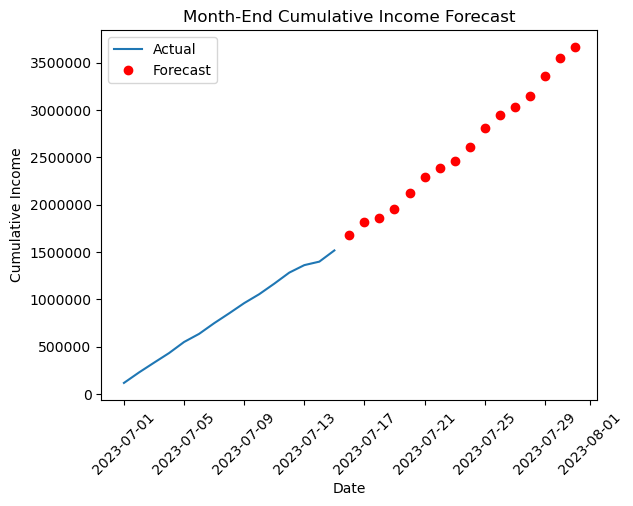

In [28]:
# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Create a DataFrame with the date and cumulative income
df_cumulative_income = pd.DataFrame({'Date': daily_cumulative_income.index, 'Cumulative Income': daily_cumulative_income.values})

# Fit ARIMA model
model = ARIMA(df_cumulative_income['Cumulative Income'], order=(3, 3, 2)) #(2,1,2)
model_fit = model.fit()

# Forecast from 16th to month-end
forecast_steps = len(df_cumulative_income) + days_to_forecast  # Assuming 31 days in the month
forecast_values = model_fit.predict(start=len(df_cumulative_income), end=forecast_steps)

# Generate date range for forecasted values
forecast_dates = pd.date_range(start=df_cumulative_income['Date'].iloc[-1], periods=len(forecast_values) + 1, freq='D')[1:]

# Plot the actual and forecasted cumulative income
plt.plot(df_cumulative_income['Date'], df_cumulative_income['Cumulative Income'], label='Actual')
plt.plot(forecast_dates, forecast_values, 'ro', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Cumulative Income')
plt.title('Month-End Cumulative Income Forecast')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis labels in plain format
plt.legend()
plt.show()

# Inferences

In [29]:
# Forecast from 16th to month-end
forecast_steps = days_to_forecast  # Assuming 31 days in the month
forecast_values = model_fit.predict(start=len(df_cumulative_income), end=len(df_cumulative_income) + forecast_steps)

# Calculate month-end income
month_end_income = forecast_values.iloc[-1]

# Calculate income in steps of 5 days
income_in_steps = forecast_values.iloc[::5]

# Generate the text
result_text = f"Month-End Income: {month_end_income}\nIncome in Steps of 5 Days:\n"

for i, income in enumerate(income_in_steps):
    result_text += f"Day {i*5+16}: {income}\n"

# Print the result
print(result_text)

Month-End Income: 3666656.766799945
Income in Steps of 5 Days:
Day 16: 1682926.299382412
Day 21: 2297533.239083391
Day 26: 2949741.653662425
Day 31: 3666656.766799945



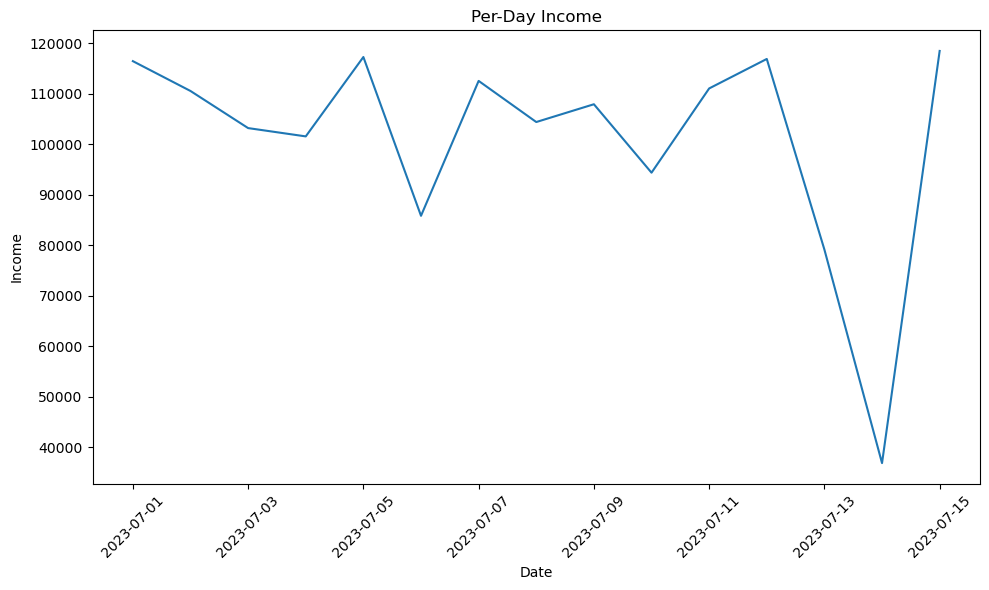

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Group the data by date and calculate the sum of the "total" column for each day
daily_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum()

# Convert the grouped data to a DataFrame
df_daily_income = pd.DataFrame({'Date': daily_income.index, 'Income': daily_income.values})

# Plot the per-day income
plt.figure(figsize=(10, 6))
plt.plot(df_daily_income['Date'], df_daily_income['Income'])
plt.xlabel('Date')
plt.ylabel('Income')
plt.title('Per-Day Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

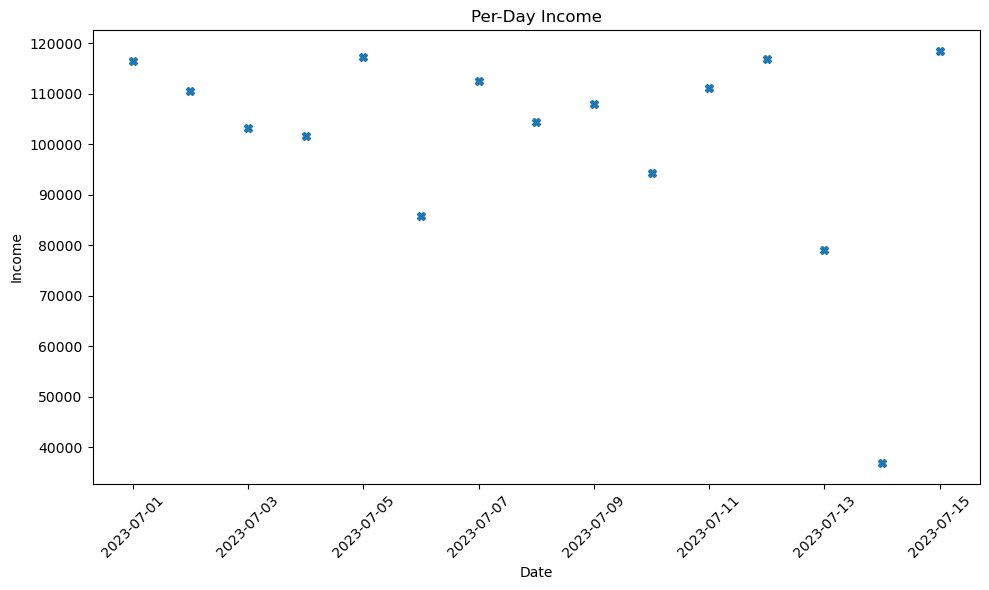

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= start_date) & (df['Order Created Date and Time'] <= end_date)]

# Group the data by date and calculate the sum of the "total" column for each day
daily_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum()

# Convert the grouped data to a DataFrame
df_daily_income = pd.DataFrame({'Date': daily_income.index, 'Income': daily_income.values})

# Plot the per-day income as dots
plt.figure(figsize=(10, 6))
plt.plot(df_daily_income['Date'], df_daily_income['Income'], 'X')
plt.xlabel('Date')
plt.ylabel('Income')
plt.title('Per-Day Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FB DATA

In [32]:
fb_data['Date'] = pd.to_datetime(fb_data['Date '], format='%d %B %Y')
fb_data.set_index('Date', inplace=True)
# fb_data = fb_data['FB ad spends ']

In [33]:
from datetime import datetime, timedelta

# Input date in string format
input_date_str = end_date

# Convert the input date string to a datetime object
input_date = datetime.strptime(input_date_str, '%Y-%m-%d')

# Calculate the previous day by subtracting one day from the input date
previous_day = input_date - timedelta(days=1)

# Convert the previous day back to a string in the same format
previous_day_str = previous_day.strftime('%Y-%m-%d')

In [34]:
fb_data = fb_data.loc[start_date:previous_day_str]

In [35]:
# fb_data

In [36]:
fb_data['FB ad spends'] = fb_data['FB ad spends '].str.replace('₹', '').str.replace(',', '').astype(float)

<Axes: xlabel='Date'>

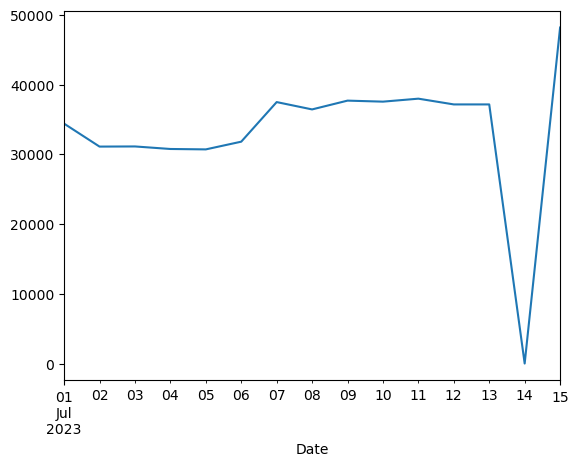

In [37]:
fb_data['FB ad spends'].plot()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Lik

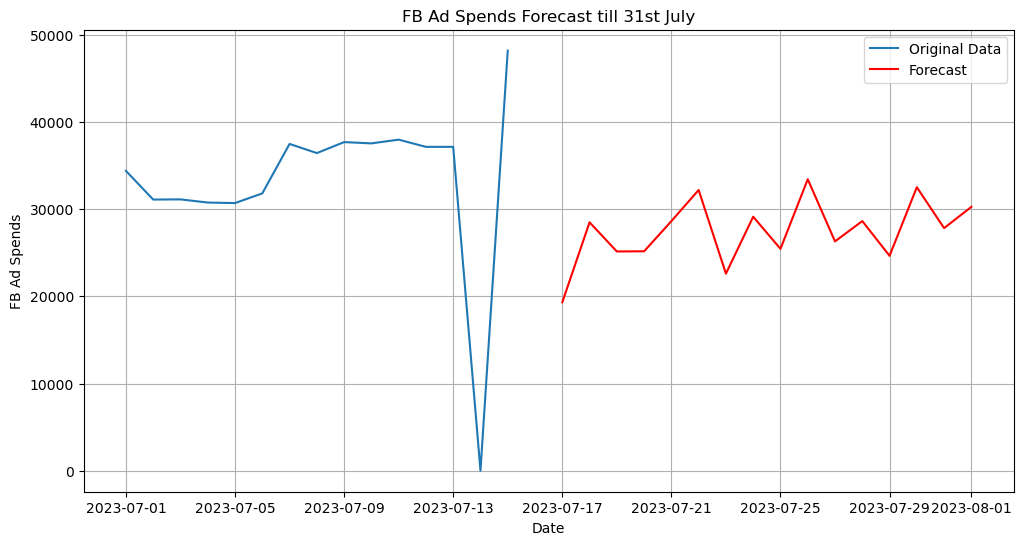

In [38]:
# Fit the ARIMA model with your data
model = ARIMA(fb_data['FB ad spends'], order=(7, 1, 5))
results = model.fit()

# Forecast the FB ad spends from 17th July to 31st July
forecast_steps = (31-15)  # Remaining days from 17th July to 31st July
forecast = results.forecast(steps=forecast_steps)

# Create a new date range for the forecast from 17th July to 31st July
date_range_forecast = pd.date_range(start= end_date, periods=forecast_steps+1 , closed='right')

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(fb_data.index, fb_data['FB ad spends'], label='Original Data')
plt.plot(date_range_forecast, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('FB Ad Spends')
plt.title('FB Ad Spends Forecast till 31st July')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df_cumulative_income['Cumulative Income'] ,fb_data['FB ad spends']

(0      116452.45
 1      226996.90
 2      330192.75
 3      431745.20
 4      549016.30
 5      634844.40
 6      747385.50
 7      851782.60
 8      959700.60
 9     1054065.70
 10    1165112.05
 11    1281999.75
 12    1361138.00
 13    1397993.60
 14    1516467.40
 Name: Cumulative Income, dtype: float64,
 Date
 2023-07-01    34394.00
 2023-07-02    31103.00
 2023-07-03    31124.00
 2023-07-04    30760.00
 2023-07-05    30702.00
 2023-07-06    31808.03
 2023-07-07    37484.63
 2023-07-08    36433.60
 2023-07-09    37693.63
 2023-07-10    37547.31
 2023-07-11    37974.11
 2023-07-12    37149.05
 2023-07-13    37149.05
 2023-07-14        0.00
 2023-07-15    48175.13
 Name: FB ad spends, dtype: float64)

In [40]:
fb_data['Cumulative Income']=  np.array(df_cumulative_income['Cumulative Income'])


# Calculate the correlation coefficient between 'Cumulative Income' and 'FB ad spends'
correlation_coefficient = fb_data['Cumulative Income'].corr(fb_data['FB ad spends'])

print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.023967428311053536


# FB DATA INTEGRATED TO THE PREDICTIONS

In [41]:
diff_spend = forecast.max()- forecast

In [42]:
diff_spend

2023-07-16    14110.128637
2023-07-17     4939.413059
2023-07-18     8282.212946
2023-07-19     8262.260077
2023-07-20     4804.238029
2023-07-21     1230.276710
2023-07-22    10829.364664
2023-07-23     4295.200739
2023-07-24     7982.706826
2023-07-25        0.000000
2023-07-26     7127.179843
2023-07-27     4797.942766
2023-07-28     8780.999734
2023-07-29      913.439389
2023-07-30     5602.816107
2023-07-31     3166.248462
Freq: D, Name: predicted_mean, dtype: float64

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


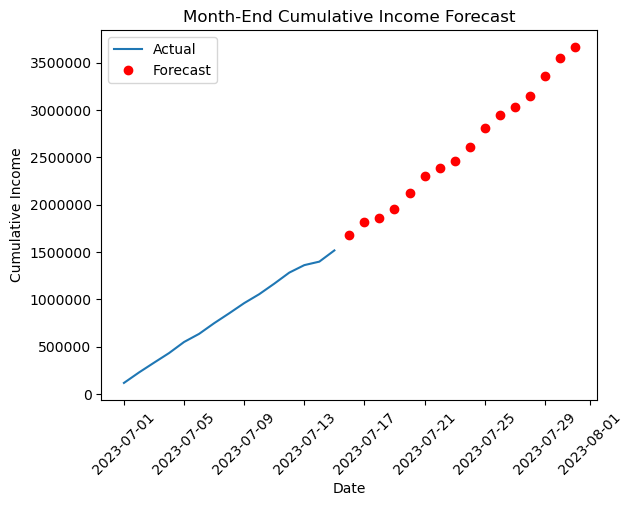

In [43]:
# Filter the DataFrame for the desired date range (July 1 to July 16)
df_july = df[(df['Order Created Date and Time'] >= '2023-07-01') & (df['Order Created Date and Time'] <= '2023-07-16')]

# Calculate the cumulative sum of the "total" column for each day
daily_cumulative_income = df_july.groupby(df_july['Order Created Date and Time'].dt.date)['total'].sum().cumsum()

# Create a DataFrame with the date and cumulative income
df_cumulative_income = pd.DataFrame({'Date': daily_cumulative_income.index, 'Cumulative Income': daily_cumulative_income.values})

# Fit ARIMA model
model = ARIMA(df_cumulative_income['Cumulative Income'], order=(3, 3, 2)) #(2,1,2)
model_fit = model.fit()

# Forecast from 16th to month-end
forecast_steps = len(df_cumulative_income) + days_to_forecast  # Assuming 31 days in the month
forecast_values = model_fit.predict(start=len(df_cumulative_income), end=forecast_steps)

# Generate date range for forecasted values
forecast_dates = pd.date_range(start=df_cumulative_income['Date'].iloc[-1], periods=len(forecast_values) + 1, freq='D')[1:]

# Plot the actual and forecasted cumulative income
plt.plot(df_cumulative_income['Date'], df_cumulative_income['Cumulative Income'], label='Actual')
plt.plot(forecast_dates, (np.array(forecast_values) - correlation_coefficient*np.array(diff_spend)) , 'ro', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Cumulative Income')
plt.title('Month-End Cumulative Income Forecast')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis labels in plain format
plt.legend()
plt.show()

In [44]:
# Forecast from 16th to month-end
forecast_steps = days_to_forecast  # Assuming 31 days in the month
forecast_values = model_fit.predict(start=len(df_cumulative_income), end=len(df_cumulative_income) + forecast_steps)
forecast_values = pd.Series(np.array(forecast_values) - correlation_coefficient*np.array(diff_spend))
# Calculate month-end income
month_end_income = forecast_values.iloc[-1]

# Calculate income in steps of 5 days
income_in_steps = forecast_values.iloc[::5]

# Generate the text
result_text = f"Month-End Income: {month_end_income}\nIncome in Steps of 5 Days:\n"

for i, income in enumerate(income_in_steps):
    result_text += f"Day {i*5+16}: {income}\n"

# Print the result
print(result_text)

Month-End Income: 3666580.8799669184
Income in Steps of 5 Days:
Day 16: 1682588.1158858545
Day 21: 2297503.752514535
Day 26: 2949570.8334904877
Day 31: 3666580.8799669184



In [45]:
# # Calculate cumulative income
# df['Cumulative Income'] = df['total'].cumsum()

# # Plotting the graph
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Cumulative Income'])
# plt.xlabel('Time')
# plt.ylabel('Cumulative Income')
# plt.title('Cumulative Income over Time')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

# lets try deploying the code

In [46]:
from fastapi import FastAPI, HTTPException, Request
import pickle

app = FastAPI()

# Load the ARIMA model
with open("arima_model.pkl", "rb") as f:
    arima_model = pickle.load(f)

@app.post("/predict/")
async def predict(request: Request):
    try:
        data = await request.json()
        values_to_predict = data["values"]

        # Perform prediction using the ARIMA model
        predictions = arima_model.predict(n_periods=len(values_to_predict))

        # Convert predictions to a list
        predictions_list = predictions.tolist()

        # Prepare the response
        response = {
            "predictions": predictions_list
        }

        return response

    except Exception as e:
        # Handle any errors that may occur during prediction
        raise HTTPException(status_code=500, detail=str(e))

FileNotFoundError: [Errno 2] No such file or directory: 'arima_model.pkl'

# lets train the ARIMA model

# PACF - Auto regression

In [ ]:
# from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# train_data

In [ ]:
# # Extract the cumulative invoice for the 3 days training period
# train_data = df[(df.index.day < 7) | (df.index.month < 7)]["Cumulative Income"]


# # Plot the ACF with respect to each 1-hour lag within the training period
# plt.figure(figsize=(12, 6))
# plot_acf(train_data, lags=5)
# plt.xlabel('Time Lag (1 day)')
# plt.ylabel('Partial Autocorrelation')
# plt.title('Autocorrelation Function (ACF) - 10 days')
# plt.grid(True)
# plt.show()

In [ ]:
# # Extract the cumulative invoice for the 3 days training period
# train_data = df[(df.index.day < 7) | (df.index.month < 7)]['Cumulative Income']

# # Plot the PACF with respect to each 1-hour lag within the  training period
# plt.figure(figsize=(12, 6))
# plot_pacf(train_data, lags=5)
# plt.xlabel('Time Lag (1 day)')
# plt.ylabel('Partial Autocorrelation')
# plt.title('Partial Autocorrelation Function (PACF) - 10 days')
# plt.grid(True)
# plt.show()

# Differencing

In [ ]:
# from statsmodels.tsa.stattools import adfuller

In [ ]:
# # Perform Dickey-Fuller test
# result = adfuller(df['Cumulative Income'])

# # Extract the test statistic and p-value
# test_statistic = result[0]
# p_value = result[1]

# # Print the test statistic and p-value
# print(f'Test Statistic: {test_statistic:.4f}')
# print(f'p-value: {p_value:.4f}')

In [ ]:
# df['Difference1'] = df['Cumulative Income']-df['Cumulative Income'].shift(1)

In [ ]:
# df['Difference1'].dropna()

In [ ]:
# # Perform Dickey-Fuller test
# result = adfuller(df['Difference1'].dropna())

# # Extract the test statistic and p-value
# test_statistic = result[0]
# p_value = result[1]

# # Print the test statistic and p-value
# print(f'Test Statistic: {test_statistic:.4f}')
# print(f'p-value: {p_value:.4f}')

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# df.index.hour

In [ ]:
# # Extract the time before noon
# train_data = df[(df.index.day < 10) | (df.index.month < 7)]['Cumulative Income']

In [ ]:
# # Fit the ARIMA model
# model = ARIMA(train_data, order=(5, 1, 2))
# model_fit = model.fit()

In [ ]:
# # Predict total invoice after noon
# test_data = df[(df.index.day >= 10) & (df.index.month >= 7)]['Cumulative Income']
# predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [ ]:
# df[df.index.day<4].index

In [ ]:
# # Plot the actual and predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Cumulative Income'], label='Actual')
# # plt.plot(test_data.index, predictions, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Cumulative Income')
# plt.title('ARIMA Model - Actual vs Predicted')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# # Plot the actual and predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(df[(df.index.day<7) | (df.index.month<7)].index,df[(df.index.day<7) | (df.index.month<7)]['Cumulative Income'], label='Actual')
# plt.plot(test_data.index, predictions, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Cumulative Income')
# plt.title('ARIMA Model - Actual vs Predicted')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# df

In [ ]:
# # Assuming your DataFrame or Series is named 'df'
# day1 = 7
# day2 = 8

# # Get the indices where the day is equal to day1
# day1_indices = df.index[df.index.day == day1]

# # Get the indices where the day is equal to day2
# day2_indices = df.index[df.index.day == day2]

# # Get the starting index of day1
# day1_start_index = day1_indices[0]

# # Get the starting index of day2
# day2_start_index = day2_indices[0]

# # Get the number of examples between day1 and day2
# num_examples_between = len(df[day1_start_index:day2_start_index]) + 1

# # Print the results
# print("Starting index of day1:", day1_start_index)
# print("Starting index of day2:", day2_start_index)
# print("Number of examples between day1 and day2:", num_examples_between)

In [ ]:
# # Forecast for the next day
# steps=196
# forecast = model_fit.forecast(steps=196)

# # Print the forecasted value for the next day
# print("Forecast for the next step:")
# print(forecast[1440+steps-1])


# print("So the turnover in the next day is:")
# print(forecast[1440+steps-1]- forecast[1440])

In [ ]:
# import pandas as pd

# # Define the start timestamp of the next day
# start_timestamp = pd.to_datetime("2023-07-9").replace(hour=0, minute=0, second=0)

# # Create the date-time index for the next day with an interval of 196 in the day
# next_day_index = pd.date_range(start=start_timestamp, periods=196, freq="7.5min")

# # Assign the new index to the forecasted values
# forecast.index = next_day_index


# # Print the forecasted values with the new index
# print("The turnover by the end of the next day ie total")
# print(forecast["2023-07-10 00:22:30"])
# # forecast
# print("")
# print("The turnover for the next day")
# print(forecast["2023-07-10 00:22:30"]-forecast["2023-07-09 00:00:00"])

In [ ]:
# import pandas as pd

# # Get the last index of the forecast
# last_index = forecast.index[-1]

# # Add one day to the last index to get the next day's date-time
# next_day_index = last_index + pd.DateOffset(days=1)

# # Update the last index of the forecast with the next day's date-time
# forecast.index = forecast.index[:-1].append(pd.Index([next_day_index]))

# # Print the forecast with the updated last index
# print(forecast)

In [ ]:
# # Plot the actual and predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Cumulative Income'], label='Actual')
# plt.plot(forecast,  color='red')
# # plt.plot(test_data.index, predictions, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Cumulative Income')
# plt.title('ARIMA Model - Actual vs Predicted')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# data = pd.read_csv('/kaggle/input/task-1/8223-itemsRequired-10-07-2023.csv')
# data.columns

In [ ]:
# data

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

# # Load your time series data into a pandas DataFrame
# # Make sure you have a column with the dates and a column with the values
# data = pd.read_csv('/kaggle/input/task-1/8223-itemsRequired-10-07-2023.csv', parse_dates=['date_created'], index_col='date_created')

# # Prepare the data for linear regression
# X = np.arange(len(df)).reshape(-1, 1)  # Use the index as the input feature
# y = df.values.flatten()  # Use the values as the target variable

# # Fit the linear regression model
# model = LinearRegression()
# model.fit(X, y)

# # Generate the forecasted values
# forecast = model.predict(X)

# # Print the forecasted values
# print(forecast)

# # Visualize the forecasted values
# plt.plot(data)
# plt.plot(data.index, forecast, color='red')
# plt.show()